Womens Clothing E-commerce reviews - Exploratory Data Analysis

required librares for EDA:

Numpy,Pandas,Matplotlib,Seaborn,sklearn(linear model)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# import statsmodels api as sm

In [5]:
# Dataset reading
Ecomm = pd.read_csv("Womens Clothing E-commerce Reviews.csv")

In [6]:
# Showing first 5 line(rows)
Ecomm.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
import pandas_profiling

In [9]:
pandas_profiling.ProfileReport(Ecomm)

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,11
Number of observations,23486
Total Missing (%),1.8%
Total size in memory,2.0 MiB
Average record size in memory,88.0 B
Numeric,5
Categorical,5
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [54]:
# numbers of rows & columns in dataframe
Ecomm.shape

(23486, 11)

In [55]:
# Information on counts, columns, column data types, memory usage, etc
Ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


>>Dataset has 23486 entries(raws) and 11 columns. Some of the entries are missing like Title,Review Text, Division Name, Department Name, and Class Name.

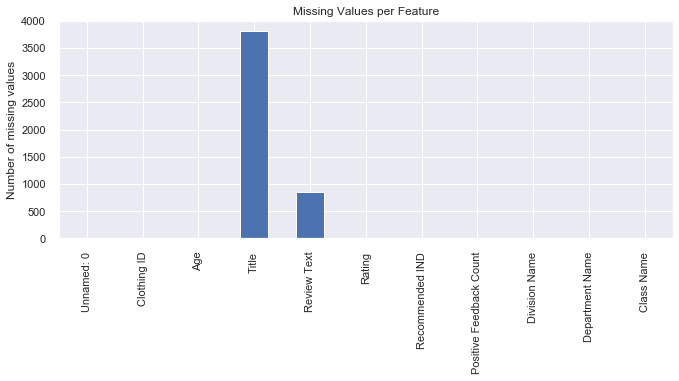

In [56]:
#the amount of missing values per feature
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(Ecomm).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing Values per Feature')


In [57]:
# Descriptive Statistics for numeric columns
Ecomm.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [58]:
Ecomm.index  # showing start and end of total no of index with gap between two raws

RangeIndex(start=0, stop=23486, step=1)

In [59]:
# Unique counts of NAN/Null for each col
Ecomm.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [60]:
Ecomm.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [7]:
Ecomm.drop(["Unnamed: 0"],axis=1,inplace=True)

In [62]:
Ecomm.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [8]:
Ecomm.Age[Ecomm['Review Text'].isnull()].count()

845

In [9]:
Ecomm['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [10]:
Ecomm['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [11]:
Ecomm['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [12]:
print('Blank reviews :', Ecomm.Age[Ecomm['Review Text'].isnull()].count())
print('Blank Titles :', Ecomm.Age[Ecomm['Title'].isnull()].count())

Blank reviews : 845
Blank Titles : 3810


In [13]:
Ecomm[Ecomm['Review Text'].isnull()].count()


Clothing ID                845
Age                        845
Title                        1
Review Text                  0
Rating                     845
Recommended IND            845
Positive Feedback Count    845
Division Name              844
Department Name            844
Class Name                 844
dtype: int64

In [14]:
#Unique counts of records for each column
print("Unique Counts for each column:")
Ecomm.nunique()


Unique Counts for each column:


Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [15]:
#Remove nan/null form review column 
Ecomm = Ecomm.dropna(subset=['Review Text'])


In [16]:
Ecomm.shape

(22641, 10)

In [17]:
Ecomm.fillna(0,inplace=True)

In [18]:
Ecomm.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [19]:
Ecomm.groupby('Class Name').agg({'Rating':['count', 'mean']}).sort_values(by=[('Rating', 'count')], ascending=False)


Rating          
                count      mean
Class Name                     
Dresses          6145  4.138812
Knits            4626  4.145698
Blouses          2983  4.142809
Sweaters         1380  4.168841
Pants            1350  4.261481
Jeans            1104  4.347826
Fine gauge       1059  4.237960
Skirts            903  4.229236
Jackets           683  4.288433
Lounge            669  4.301943
Swim              332  4.171687
Outerwear         319  4.181818
Shorts            304  4.253289
Sleep             214  4.294393
Legwear           158  4.246835
Intimates         147  4.278912
Layering          132  4.348485
Trend             118  3.838983
0                  13  5.000000
Chemises            1  4.000000
Casual bottoms      1  4.000000

In [75]:
Ecomm.groupby('Rating').sum()

,Clothing ID,Age,Recommended IND,Positive Feedback Count
Rating,,,,
1,753048,35886,15,2913
2,1434905,66002,94,5205
3,2620600,119027,1170,9030
4,4530040,211104,4744,12213
5,11476011,547892,12517,30198


In [76]:
Ecomm.groupby('Class Name').agg({'Recommended IND':['count', 'sum']}).sort_values(by=[('Recommended IND', 'count')], ascending=False)

Recommended IND      
                         count   sum
Class Name                          
Dresses                   6145  4948
Knits                     4626  3758
Blouses                   2983  2406
Sweaters                  1380  1100
Pants                     1350  1124
Jeans                     1104   971
Fine gauge                1059   882
Skirts                     903   760
Jackets                    683   576
Lounge                     669   574
Swim                       332   264
Outerwear                  319   259
Shorts                     304   255
Sleep                      214   183
Legwear                    158   135
Intimates                  147   126
Layering                   132   116
Trend                      118    88
0                           13    13
Chemises                     1     1
Casual bottoms               1     1

In [77]:
Ecomm.groupby('Class Name').agg({'Positive Feedback Count':['count', 'sum']}).sort_values(by=[('Positive Feedback Count', 'count')], ascending=False)


Positive Feedback Count       
                                 count    sum
Class Name                                   
Dresses                           6145  19510
Knits                             4626  11598
Blouses                           2983   8440
Sweaters                          1380   3154
Pants                             1350   3327
Jeans                             1104   2018
Fine gauge                        1059   2215
Skirts                             903   2167
Jackets                            683   1990
Lounge                             669   1604
Swim                               332    750
Outerwear                          319    926
Shorts                             304    531
Sleep                              214    399
Legwear                            158    210
Intimates                          147    120
Layering                           132    192
Trend                              118    401
0                                   13      7
Chemises                             1      0
Casual bottoms                       1      0

In [78]:
Ecomm['Positive Feedback Count'].unique()

array([  0,   4,   6,   1,  14,   2,   3,   7,   5,   9,  34,  10,  17,
        11,  24,  12,   8,  13,  20,  16,  23,  15,  19,  29,  32,  30,
        55,  84,  27,  43,  21,  42,  37,  71,  35,  65, 117,  33,  18,
        25,  47,  22,  51,  94,  31,  77,  61,  46,  26,  28,  36,  57,
        45,  66,  82,  44,  81,  58,  78,  38,  49,  52, 122,  41, 108,
        54,  40,  53,  87,  64,  89,  68,  56,  98,  95,  39,  93,  48,
        99,  50,  69,  59], dtype=int64)

In [79]:
Ecomm['Recommended IND'].unique()


array([1, 0], dtype=int64)

In [80]:
len(Ecomm['Clothing ID'].unique())

1179

In [20]:
Ecomm.groupby('Division Name').sum().sort_values(by='Rating',ascending=False).iloc[:5]

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
Division Name,,,,,
General,12726788,580398,55669,10872,35717
General Petite,7502458,340127,32889,6446,21125
Initmates,581633,58880,6097,1209,2710
0,3725,506,65,13,7


In [82]:
Ecomm['Department Name'].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
0              13
Name: Department Name, dtype: int64

What age group has given what types of Ratings???

Text(0.5, 1.0, 'Number of reviews per Age')

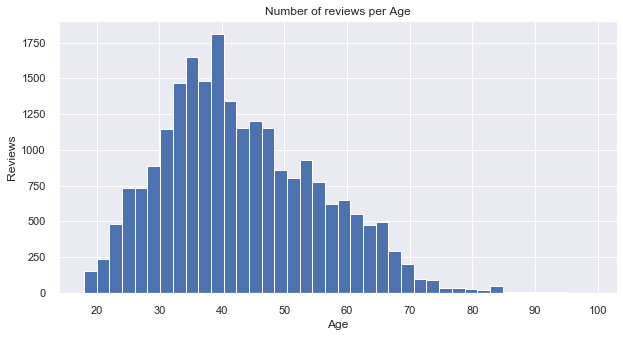

In [83]:
# Lets see the age distribution
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.hist(Ecomm.Age, bins=40)
plt.xlabel('Age')
plt.ylabel('Reviews')
plt.title('Number of reviews per Age')

# Can say that, age group 25-55 is the most reviewing age group.

Text(0.5, 1.0, 'Rating Distribution per Age')

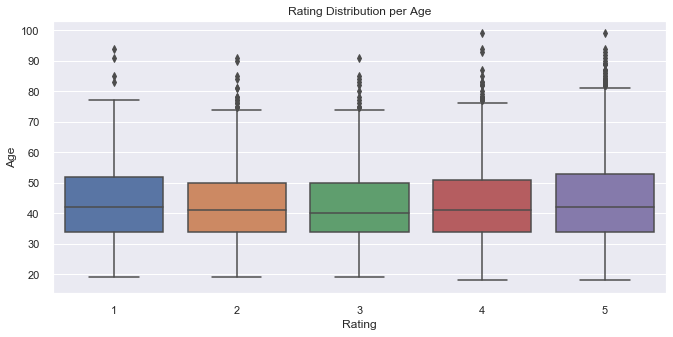

In [84]:
#looking at the distribution of ratings per age.
sns.set()
plt.figure(figsize=(11,5))
sns.boxplot(x = 'Rating', y = 'Age', data = Ecomm)
plt.title('Rating Distribution per Age')


<Figure size 792x432 with 0 Axes>

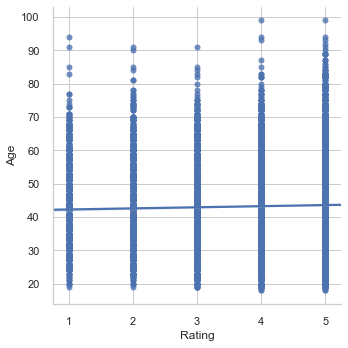

In [85]:
plt.figure(figsize=(11,6))
sns.set(style='whitegrid')
sns.lmplot(x='Rating',y='Age',data=Ecomm)

Text(0.5, 1.0, 'Frequency Distribution of Rating')

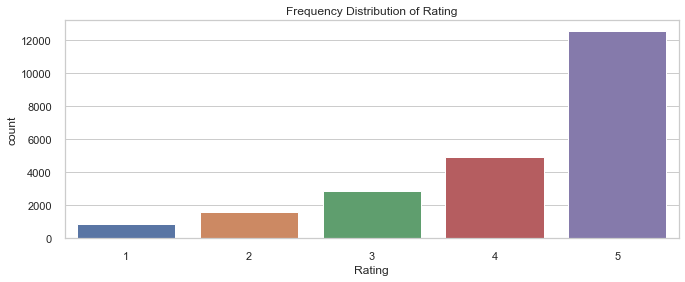

In [86]:
##Frequency distribution of rating
sns.countplot(x='Rating',data=Ecomm)
plt.title("Frequency Distribution of Rating")


# Rating scores are showing a general satisfaction.

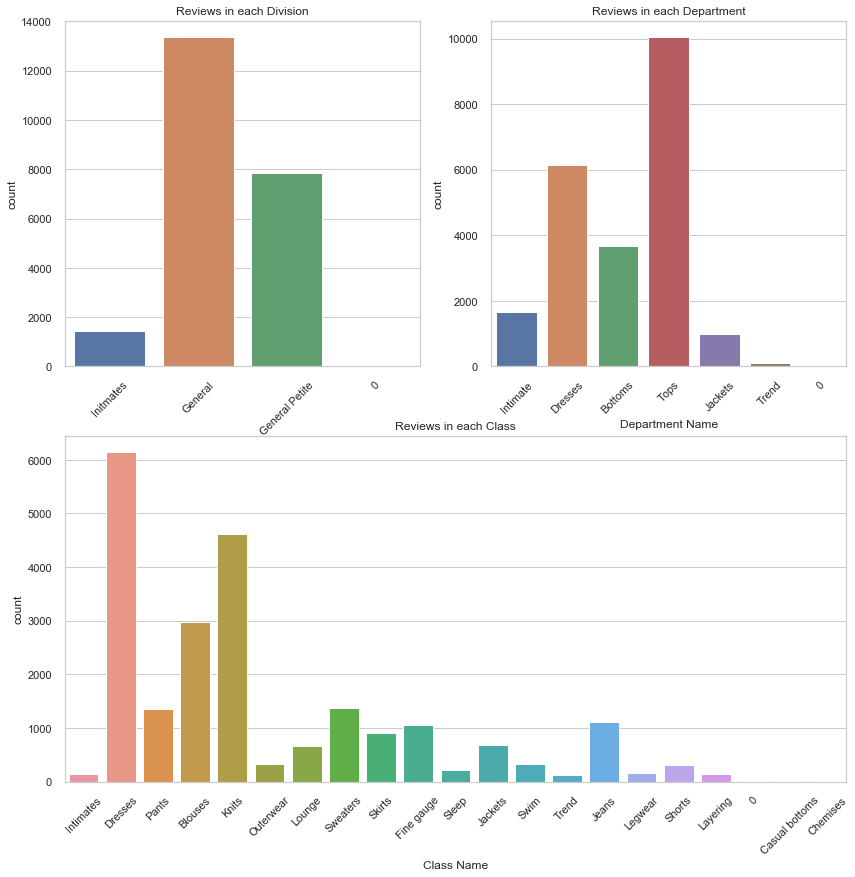

In [87]:
#look at the distributions of Division/Department/Class
figure = plt.figure(figsize=(14, 14))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = sns.countplot(Ecomm['Division Name'])
ax1 = plt.title("Reviews in each Division")


ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = sns.countplot(Ecomm['Department Name'])
ax2 = plt.title("Reviews in each Department")


ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=3)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(Ecomm['Class Name'])
ax3 = plt.title("Reviews in each Class")

In [21]:
#plot the most Recommended and not Recommended item 
recommended = Ecomm[Ecomm['Recommended IND']==1]
not_recommended = Ecomm[Ecomm['Recommended IND']==0]


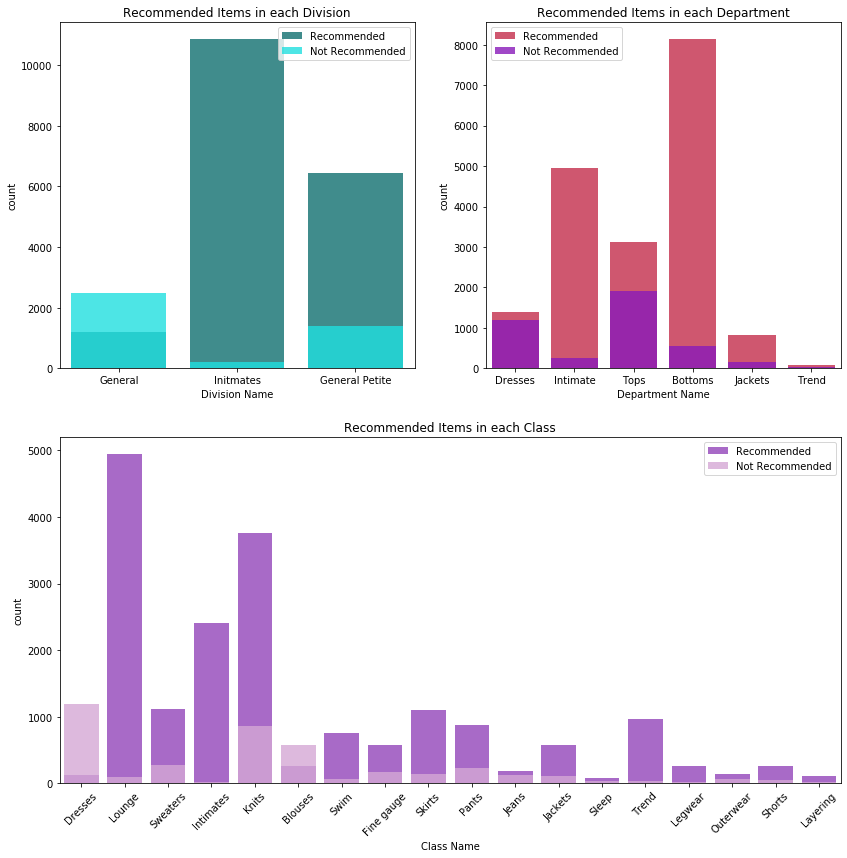

In [22]:
#plt.style.use('ggplot')
fig = plt.figure(figsize=(14, 14))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.countplot(recommended['Division Name'], color = "teal", alpha = 0.8, label = "Recommended")
ax1 = sns.countplot(not_recommended['Division Name'], color = "cyan", alpha = 0.8, label = "Not Recommended")
ax1 = plt.title("Recommended Items in each Division")
ax1 = plt.legend()

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.countplot(recommended['Department Name'], color="crimson", alpha = 0.8, label = "Recommended")
ax2 = sns.countplot(not_recommended['Department Name'], color="darkviolet", alpha = 0.8, label = "Not Recommended")
ax2 = plt.title("Recommended Items in each Department")
ax2 = plt.legend()

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(recommended['Class Name'], color="darkorchid", alpha = 0.8, label = "Recommended")
ax3 = sns.countplot(not_recommended['Class Name'], color="plum", alpha = 0.8, label = "Not Recommended")
ax3 = plt.title("Recommended Items in each Class")
ax3 = plt.legend()


Comments:-

1. Initmates Division Name are most recommended

2. Bottoms department is most recommended where as Trend Departmet is rarely recommended

3. In class name Dresses & Blouses deparment need attention

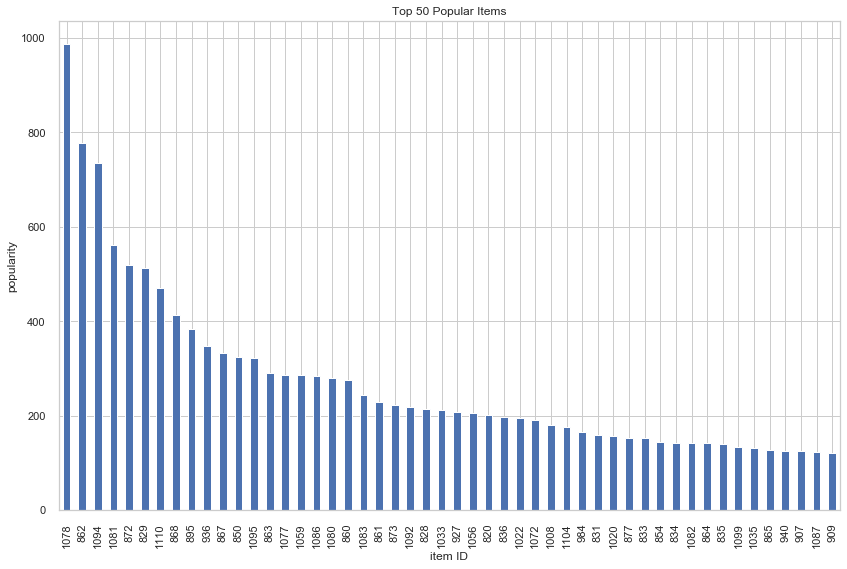

In [90]:
# plot showing most popular 50 items/products
plt.figure(figsize=(14, 9))
plt.xlabel('item ID')
plt.ylabel('popularity')
plt.title("Top 50 Popular Items")
Ecomm['Clothing ID'].value_counts()[:50].plot(kind='bar')


In [91]:
Ecomm.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

Which age group gives what length of comments on what type of clothes????

In [10]:
Ecomm['Review Length'] = Ecomm['Review Text'].astype(str).apply(len)
Ecomm.head()


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


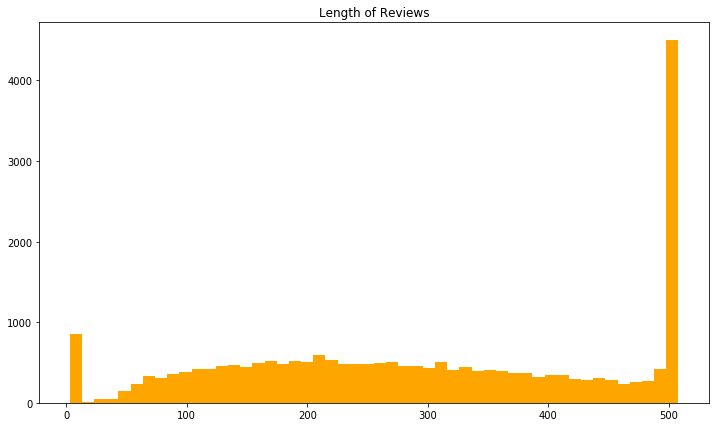

In [11]:
fig = plt.figure(figsize=(12,7))
ax1 = plt.hist(Ecomm['Review Length'],color = "orange", bins = 50)
ax = plt.title("Length of Reviews")


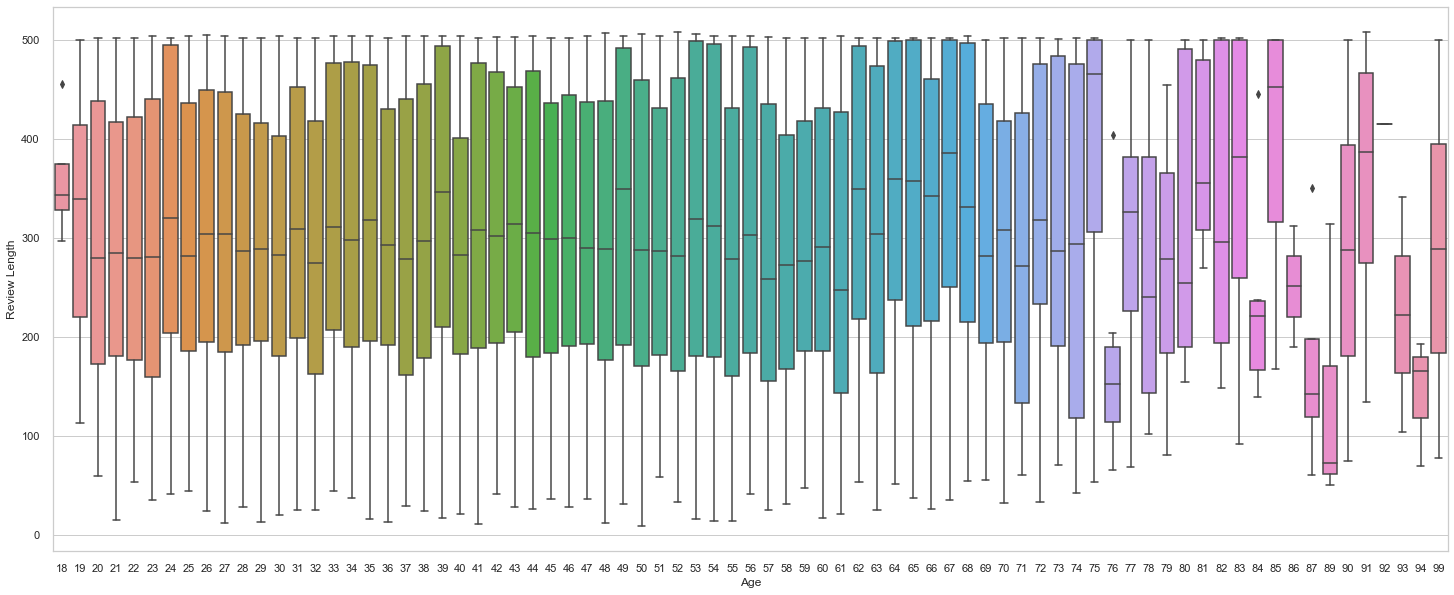

In [94]:
plt.figure(figsize=(25,10))
sns.boxplot(x = 'Age', y = 'Review Length', data = Ecomm)

In [95]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


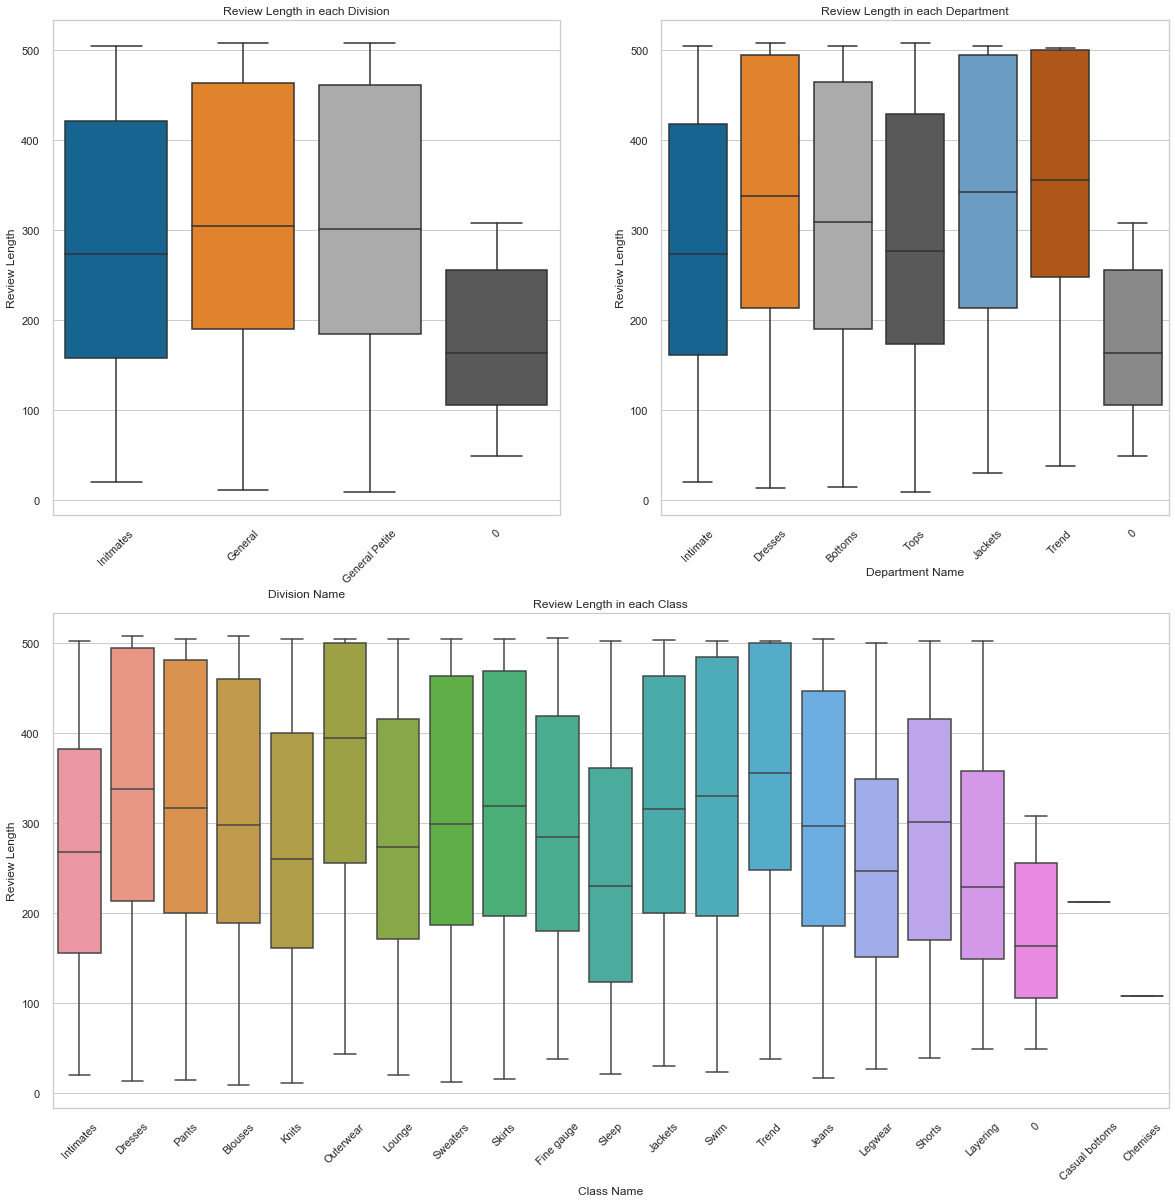

In [96]:
plt.style.use('tableau-colorblind10')

fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = sns.boxplot(x = 'Division Name', y = 'Review Length', data = Ecomm)
ax1 = plt.title("Review Length in each Division")

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = sns.boxplot(x = 'Department Name', y = 'Review Length', data = Ecomm)
ax2 = plt.title("Review Length in each Department")

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.boxplot(x = 'Class Name', y = 'Review Length', data = Ecomm)
ax3 = plt.title("Review Length in each Class")


Rating Vs. Positive feedback count

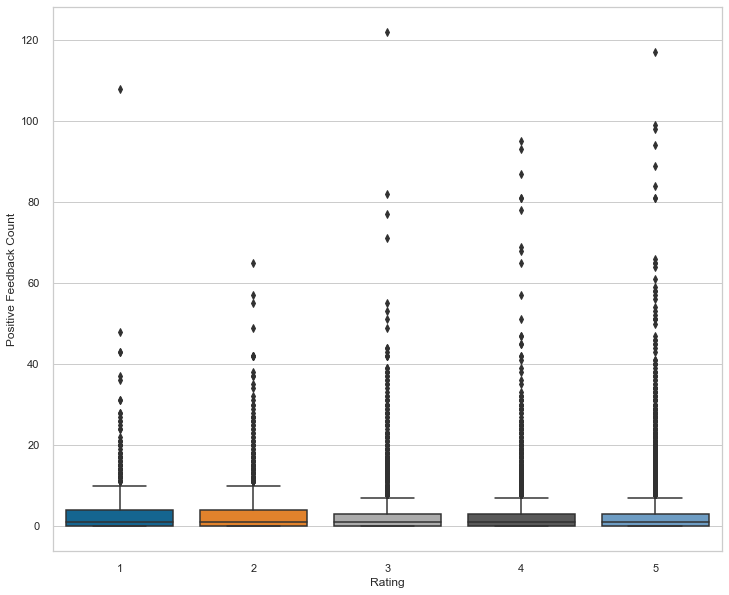

In [97]:
plt.figure(figsize=(12,10))
sns.boxplot(x = 'Rating', y = 'Positive Feedback Count', data = Ecomm)


In [98]:
Ecomm.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Review Length'],
      dtype='object')

# Pridiction with sklearn_simple linear regration

In [22]:
x = Ecomm[['Age','Rating']] 
y = Ecomm['Positive Feedback Count']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x,y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n',regr.coef_)



Intercept: 
 3.062328090301796
Coefficients: 
 [ 0.02082864 -0.33988271]


In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [103]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
print(regr.intercept_)
print(regr.coef_)


3.146821548790678
[ 0.01943715 -0.32999069]


In [115]:
y_pred = regr.predict(x_test)
y_pred

array([2.25491703, 2.21604272, 2.93433556, ..., 2.60478576, 2.25491703,
       3.41982346])

In [8]:
Ecomm.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

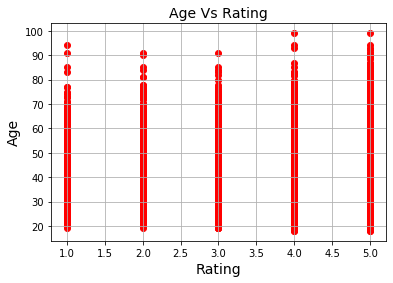

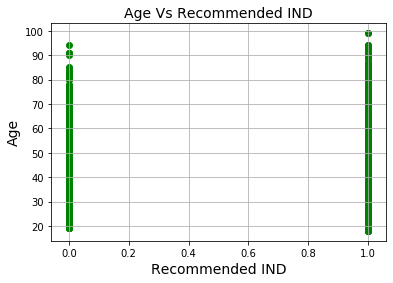

In [20]:
plt.scatter(Ecomm['Rating'], Ecomm['Age'], color='red')
plt.title('Age Vs Rating', fontsize=14)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(Ecomm['Recommended IND'], Ecomm['Age'], color='green')
plt.title('Age Vs Recommended IND', fontsize=14)
plt.xlabel('Recommended IND', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(True)
plt.show()




In [24]:
X = Ecomm[['Rating','Recommended IND','Review Length','Positive Feedback Count']] 
Y = Ecomm['Age']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 41.33273294163818
Coefficients: 
 [0.11032819 0.85151918 0.00160056 0.08917546]
